# COVID-19 Challenge: Comparison between California and New York
## Group: Super Duper

__Install packages__

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import twint
import sys
import nest_asyncio
import preprocessor as p
from textblob import TextBlob
import plotly
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.graph_objects as go
import ast
from wordcloud import WordCloud
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload 2
sys.path.append("twint/")
pd.set_option('max_columns', None)  # To display all the columns in a dataframe

## Part 1: Data Processing on Datasets for Dashboard Development

__Load DataSets__

In [3]:
daily_df = pd.read_csv("daily.csv")
hospitalization_df = pd.read_csv("Hospitalization_all_locs.csv")

time: 104 ms


In [4]:
mobility_df = pd.read_csv("Citymapper_Mobility_Index_20200412.csv")

time: 4.99 ms


__Data Preprocessing__

In [5]:
unwanted_columns = ['pending','hash','dateChecked', 'hospitalized', 'total','posNeg', 'fips', 'onVentilatorCurrently','onVentilatorCumulative','hospitalizedCumulative','inIcuCumulative','hospitalizedIncrease','recovered']
wanted_columns =  [i for i in list(daily_df.columns) if i not in unwanted_columns] 
daily_df = daily_df[wanted_columns]

time: 6.98 ms


In [6]:
daily_df['date'] = daily_df['date'].apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))
daily_df = daily_df[(daily_df['date']>='2020-03-01') & (daily_df['date']<='2020-04-11')]

time: 25.9 ms


In [7]:
daily_CA_df = daily_df[daily_df['state'] == 'CA']
daily_NY_df = daily_df[daily_df['state'] == 'NY']

time: 2.99 ms


In [8]:
daily_CA_df.head()

,date,state,positive,negative,hospitalizedCurrently,inIcuCurrently,death,totalTestResults,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-04-11,CA,19472.0,152604.0,5236.0,1591.0,541.0,172076.0,0.0,7213.0,0.0,7213.0
61,2020-04-10,CA,19472.0,145391.0,2897.0,1145.0,541.0,164863.0,49.0,200.0,1163.0,1363.0
117,2020-04-09,CA,18309.0,145191.0,2825.0,1132.0,492.0,163500.0,50.0,17884.0,1352.0,19236.0
173,2020-04-08,CA,16957.0,127307.0,2714.0,1154.0,442.0,144264.0,68.0,11943.0,1092.0,13035.0
229,2020-04-07,CA,15865.0,115364.0,2611.0,1108.0,374.0,131229.0,31.0,12269.0,1529.0,13798.0


time: 16.9 ms


In [9]:
daily_NY_df.head()

,date,state,positive,negative,hospitalizedCurrently,inIcuCurrently,death,totalTestResults,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,2020-04-11,NY,180458.0,260522.0,18654.0,5009.0,8627.0,440980.0,783.0,13149.0,9946.0,23095.0
93,2020-04-10,NY,170512.0,247373.0,18569.0,4908.0,7844.0,417885.0,777.0,15761.0,10575.0,26336.0
149,2020-04-09,NY,159937.0,231612.0,18279.0,4925.0,7067.0,391549.0,799.0,15775.0,10621.0,26396.0
205,2020-04-08,NY,149316.0,215837.0,18079.0,4593.0,6268.0,365153.0,779.0,14642.0,10453.0,25095.0
261,2020-04-07,NY,138863.0,201195.0,17493.0,4593.0,5489.0,340058.0,731.0,11073.0,8174.0,19247.0


time: 10.9 ms


In [10]:
unwanted_columns = ['V1']
wanted_columns =  [i for i in list(hospitalization_df.columns) if i not in unwanted_columns] 
hospitalization_df = hospitalization_df[wanted_columns]

time: 5.96 ms


In [11]:
hospitalization_df['date'] = hospitalization_df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
hospitalization_df = hospitalization_df[(hospitalization_df['date']>='2020-03-01') & (hospitalization_df['date']<='2020-04-11')]

time: 264 ms


In [12]:
hospitalization_CA_df = hospitalization_df[hospitalization_df['location_name'] == 'California']
hospitalization_NY_df = hospitalization_df[hospitalization_df['location_name'] == 'New York']

time: 2.01 ms


In [13]:
hospitalization_CA_df.head()

,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper
25858,California,2020-03-01,10.946625,6.333333,19.181818,1.000000,1.000000,1.000,1.000000,1.0000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25859,California,2020-03-02,10.946625,6.333333,19.181818,1.630535,1.142857,2.375,1.410134,1.0625,2.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.630535,0.142857,1.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25860,California,2020-03-03,10.946625,6.333333,19.181818,1.630535,1.142857,2.375,1.410134,1.0625,2.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25861,California,2020-03-04,10.946625,6.333333,19.181818,1.630535,1.142857,2.375,1.410134,1.0625,2.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25862,California,2020-03-05,21.060864,12.930000,32.251103,1.630535,1.142857,2.375,1.410134,1.0625,2.0,0.0,0.0,0.0,11.114239,6.352451,19.0,1.000000,1.000000,1.000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 17.9 ms


In [15]:
wanted_columns =  ['Date','Los Angeles','New York City','San Francisco'] 
mobility_df = mobility_df[wanted_columns]

time: 999 µs


In [16]:
mobility_df.head()

,Date,Los Angeles,New York City,San Francisco
0,3/2/2020,1.07,1.00,1.00
1,3/3/2020,1.10,1.02,1.00
2,3/4/2020,1.08,1.04,0.96
3,3/5/2020,1.04,1.02,0.95
4,3/6/2020,1.00,1.03,0.93


time: 4.98 ms


In [ ]:
# Output the processed datasets.
daily_CA_df.to_csv('daily_CA_df.csv')
daily_NY_df.to_csv('daily_NY_df.csv')

hospitalization_CA_df.to_csv('hospitalization_CA_df.csv')
hospitalization_NY_df.to_csv('hospitalization_NY_df.csv')

mobility_df.to_csv('mobility_df.csv')

## Part2: Request Twitter Data & Analysis using NLP

### Scrape Twitter Data with twint

In [59]:
# Solve compatibility issues with notebooks and RunTime errors.
nest_asyncio.apply()

time: 359 ms


In [ ]:
# Request data use the twint
c = twint.Config() # Set up TWINT config
c.Username = "GavinNewsom"
c.Limit = 200
c.Store_csv = True
c.Output = "Tweets_Gavin_Newsom.csv"
twint.run.Search(c)

In [ ]:
# Request data use the twint
c = twint.Config() # Set up TWINT config
c.Username = "NYGovCuomo"
c.Limit = 1000
c.Store_csv = True
c.Output = "Tweets_Andrew_Cuomo.csv"
twint.run.Search(c)

In [2]:
# Read in twitter data just downloaded
Newsom_tweets = pd.read_csv('Tweets_Gavin_Newsom.csv')
Cuomo_tweets = pd.read_csv('Tweets_Andrew_Cuomo.csv')

time: 150 ms


In [3]:
wanted_columns =  ['id','conversation_id','date','timezone', 'username','tweet','hashtags','retweets_count','likes_count'] 
Newsom_tweets = Newsom_tweets[wanted_columns]
Cuomo_tweets = Cuomo_tweets[wanted_columns]

time: 117 ms


In [4]:
# Since the data returned by twint contains a lot of duplicates, so we deduplicate first
Newsom_tweets = Newsom_tweets.drop_duplicates(subset=['id', 'conversation_id'])
Cuomo_tweets = Cuomo_tweets.drop_duplicates(subset=['id', 'conversation_id'])

time: 109 ms


In [5]:
# Transfer the date column to datetime object.
Newsom_tweets['date'] = Newsom_tweets['date'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
Newsom_tweets = Newsom_tweets[(Newsom_tweets['date']>='2020-02-01') & (Newsom_tweets['date']<='2020-04-11')]

Cuomo_tweets['date'] = Cuomo_tweets['date'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
Cuomo_tweets = Cuomo_tweets[(Cuomo_tweets['date']>='2020-02-01') & (Cuomo_tweets['date']<='2020-04-11')]

time: 133 ms


In [6]:
Newsom_tweets.head()

,id,conversation_id,date,timezone,username,tweet,hashtags,retweets_count,likes_count
1,1249071231875203072,1249071231875203072,2020-04-11,Pacific Daylight Time,gavinnewsom,THANK YOU -- to our essential workers on the f...,[],1453,11992
2,1249004750500007938,1249004750500007938,2020-04-11,Pacific Daylight Time,gavinnewsom,CA has been flattening the curve thanks to mil...,[],3085,13459
3,1248764540214366208,1248764540214366208,2020-04-10,Pacific Daylight Time,gavinnewsom,Can’t stress this enough --\n\nPhysical distan...,['#stayhomesavelives'],10159,41431
4,1248741451552284672,1248741451552284672,2020-04-10,Pacific Daylight Time,gavinnewsom,"Love this --\n""A reassuring smile makes a big ...",[],991,6900
5,1248733145278451713,1248733145278451713,2020-04-10,Pacific Daylight Time,gavinnewsom,Thanks for chatting @TheRock. These are trying...,['#stayhomesavelives'],251,1766


time: 111 ms


In [7]:
Cuomo_tweets.head()

,id,conversation_id,date,timezone,username,tweet,hashtags,retweets_count,likes_count
9,1249116704443183105,1249116704443183105,2020-04-11,Pacific Daylight Time,nygovcuomo,We know it is challenging but for those celebr...,['#easter'],1914,15821
10,1249066958202568704,1249066958202568704,2020-04-11,Pacific Daylight Time,nygovcuomo,Thank you to the essential workers who show up...,['#healthcareheroes'],2064,12271
11,1249003253351800833,1249003253351800833,2020-04-11,Pacific Daylight Time,nygovcuomo,I know we all want things to go back to normal...,[],14242,76195
12,1249002572989554689,1249002572989554689,2020-04-11,Pacific Daylight Time,nygovcuomo,What do we do now? \n\n-More and faster testin...,[],1515,9025
13,1249002049674653699,1249002049674653699,2020-04-11,Pacific Daylight Time,nygovcuomo,"We believe we have hit the ""apex"" — and the ap...",[],3968,23331


time: 122 ms


In [8]:
tweets_df = pd.concat([Newsom_tweets,Cuomo_tweets])

time: 107 ms


In [9]:
tweets_df.head()

,id,conversation_id,date,timezone,username,tweet,hashtags,retweets_count,likes_count
1,1249071231875203072,1249071231875203072,2020-04-11,Pacific Daylight Time,gavinnewsom,THANK YOU -- to our essential workers on the f...,[],1453,11992
2,1249004750500007938,1249004750500007938,2020-04-11,Pacific Daylight Time,gavinnewsom,CA has been flattening the curve thanks to mil...,[],3085,13459
3,1248764540214366208,1248764540214366208,2020-04-10,Pacific Daylight Time,gavinnewsom,Can’t stress this enough --\n\nPhysical distan...,['#stayhomesavelives'],10159,41431
4,1248741451552284672,1248741451552284672,2020-04-10,Pacific Daylight Time,gavinnewsom,"Love this --\n""A reassuring smile makes a big ...",[],991,6900
5,1248733145278451713,1248733145278451713,2020-04-10,Pacific Daylight Time,gavinnewsom,Thanks for chatting @TheRock. These are trying...,['#stayhomesavelives'],251,1766


time: 109 ms


### EDA on Twitter Data

#### Explore Tweets Counts

In [10]:
labels = ['Cuomo','Newsom']
values = [tweets_df['username'].value_counts()[0], tweets_df['username'].value_counts()[1]]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0], marker_colors = ['#ffac41','#ff1e56'])])

fig.update_layout( title="Numer of Tweets since March",
                  paper_bgcolor='#000000', 
                  plot_bgcolor='#000000',
                 font=dict(family="Courier New, monospace",
                            size=18,
                            color="#f4f4f4"))
fig.show()

time: 972 ms


Cuomo tweet a lot more than Newsom since February.

In [11]:
# Create dataframe for visualization
Newsom_daily_num = pd.DataFrame(Newsom_tweets['date'].value_counts())
Newsom_daily_num.columns = ['count']
Newsom_daily_num['governor'] = ['Newsom'] * (Newsom_daily_num.shape[0])

Cuomo_daily_num = pd.DataFrame(Cuomo_tweets['date'].value_counts())
Cuomo_daily_num.columns = ['count']
Cuomo_daily_num['governor'] = ['Cuomo'] * (Cuomo_daily_num.shape[0])

tweets_daily_count = pd.concat([Newsom_daily_num,Cuomo_daily_num], axis=0)
# generate tweets count dataframe for Newsom and Cuomo 
Newsom_count_df = tweets_daily_count[tweets_daily_count['governor'] == 'Newsom']
Newsom_count_df = Newsom_count_df.sort_index()
Newsom_count_df.reset_index(inplace = True)
Newsom_count_df.columns = ['date','count','governor']

Cuomo_count_df = tweets_daily_count[tweets_daily_count['governor'] == 'Cuomo']
Cuomo_count_df = Cuomo_count_df.sort_index()
Cuomo_count_df.reset_index(inplace = True)
Cuomo_count_df.columns = ['date','count','governor']

count_fullDate = pd.merge(Newsom_count_df, Cuomo_count_df, on = 'date', how = 'outer')
count_fullDate = count_fullDate[['date','count_x','count_y']]
count_fullDate.columns = ['date','count_Newsom','count_Cuomo']
count_fullDate.fillna(0,inplace = True)
count_fullDate.sort_values(by='date',inplace = True)
count_fullDate.count_Newsom = count_fullDate.count_Newsom.astype(int)

time: 140 ms


In [12]:
x = count_fullDate['date']
y0 = count_fullDate['count_Newsom']
y1 = count_fullDate['count_Cuomo']

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Newsom',
                    marker = dict(color = '#ff1e56',)))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Cuomo',
                    marker = dict(color = '#ffac41',)))

fig.update_layout(
    title="Daily Tweets Count",
    xaxis_title="Date",
    yaxis_title="Tweets Count",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)

fig.show()

time: 304 ms


Cuomo and Newsom both tend to tweet more since the end of February. However, Cuomo tweet a lot more than he did before and Newsom just have slightly increase his number of tweets on average.

In [13]:
# Add histogram data
x1 = count_fullDate['count_Newsom']
x2 = count_fullDate['count_Cuomo']

# Group data together
hist_data = [x1, x2]

group_labels = ['Newsom', 'Cuomo']

color = ['#ff1e56','#ffac41']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, colors = color)
fig.update_layout(
    title="Tweets Count Distribution",
    xaxis_title="Count",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)

fig.show()

time: 306 ms


Cuomo send more tweets everyday than Newsome.

#### Explore Retweets and Likes

In [14]:
# Visualize the "Number of Retweets"

# Add histogram data
x1 = list(tweets_df[tweets_df['username'] == 'gavinnewsom']['retweets_count'])
x2 = list(tweets_df[tweets_df['username'] == 'nygovcuomo']['retweets_count'])


trace1 = go.Box(
    y=x1,
    name = 'Newsom',
    marker = dict(
        color = '#ff1e56',))
trace2 = go.Box(
    y=x2,
    name = 'Cuomo',
    marker = dict(
        color = '#ffac41',))

data = [trace1, trace2]
layout = go.Layout(
    title = "Boxplot of Retweets Count",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)

fig = go.Figure(data=data,layout=layout)
fig.show()

# from the boxplot, we find outlier, so eliminate outlier and draw the distribution plot
x2.sort()
x2 = x2[0:(len(x2)-2)]

# Group data together
hist_data = [x1, x2]
group_labels = ['Newsom', 'Cuomo']
color = ['#ff1e56','#ffac41']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1000, colors = color)
fig.update_layout(
    title="Retweets Count Distribution",
    xaxis_title="Count",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)
fig.show()

time: 436 ms


In [15]:
# Visualize the "Number of Likes"

# Add histogram data
x1 = list(tweets_df[tweets_df['username'] == 'gavinnewsom']['likes_count'])
x2 = list(tweets_df[tweets_df['username'] == 'nygovcuomo']['likes_count'])


trace1 = go.Box(
    y=x1,
    name = 'Newsom',
    marker = dict(
        color = '#ff1e56',))
trace2 = go.Box(
    y=x2,
    name = 'Cuomo',
    marker = dict(
        color = '#ffac41',))

data = [trace1, trace2]
layout = go.Layout(
    title = "Boxplot of Likes Count",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4"))

fig = go.Figure(data=data,layout=layout)
fig.show()

# from the boxplot, we find outlier, so eliminate outlier and draw the distribution plot
x2.sort()
x2 = x2[0:(len(x2)-3)]

# Group data together
hist_data = [x1, x2]
group_labels = ['Newsom', 'Cuomo']
color = ['#ff1e56','#ffac41']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1000, colors = color)
fig.update_layout(
    title="Likes Count Distribution",
    xaxis_title="Count",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)
fig.show()

time: 548 ms


Cuomo's tweets were retweeted and liked more than tweets of Newsom. Cuomo is more influential in twitter than Newsom.

#### Explore the Hashtags

In [16]:
# hashtags are saved as strings so we first transfer the variable into list representation
Newsom_tweets['hashtags'] = Newsom_tweets['hashtags'].apply(lambda x: ast.literal_eval(x))
Cuomo_tweets['hashtags'] = Cuomo_tweets['hashtags'].apply(lambda x: ast.literal_eval(x))

# change the empty hashtags lists to nan
Newsom_tweets['hashtags'] = Newsom_tweets['hashtags'].apply(lambda y: np.nan if len(y)==0 else y)
Cuomo_tweets['hashtags'] = Cuomo_tweets['hashtags'].apply(lambda y: np.nan if len(y)==0 else y)

Newsom_hashtags = Newsom_tweets[['date','hashtags']].dropna()
Cuomo_hashtags = Cuomo_tweets[['date','hashtags']].dropna()

time: 177 ms


In [17]:
# break hashtags lists that contain more than one hashtag into single element with corresponding date
Newsom_hashtags = Newsom_hashtags.assign(list=Newsom_hashtags["hashtags"].str.split(", ")).explode("hashtags")[['date','hashtags']]
Cuomo_hashtags = Cuomo_hashtags.assign(list=Cuomo_hashtags["hashtags"].str.split(", ")).explode("hashtags")[['date','hashtags']]

time: 211 ms


In [18]:
Newsom_hashtags['hashtags'].value_counts()

#covid19               31
#stayhomesavelives     19
#casots                 9
#covidー19               3
#usnsmercy              2
#sbliv                  1
#goniners               1
#coronavirus            1
#nationaldoctorsday     1
#superbowl              1
#askthegov              1
Name: hashtags, dtype: int64

time: 192 ms


In [19]:
Cuomo_hashtags['hashtags'].value_counts()

#coronavirus                     133
#covid19                          33
#newyorktough                     22
#nohateinourstate                 11
#breaking                          9
#stayathome                        6
#getcountedny                      5
#newyorkstatestrongertogether      5
#paidsickleave                     5
#flattenthecurve                   4
#pinktax                           3
#stayhome                          3
#telehealth                        3
#isles                             2
#nationaldoctorsday                2
#stopthespread                     2
#heroesmovingheroes                2
#lovemakesafamilyny                2
#covid                             2
#novapeny                          2
#socialdistancing                  1
#lovemakesafamily                  1
#passover                          1
#worldwildlifeday                  1
#healthcareheroes                  1
#2020census                        1
#miracleonice                      1
#

time: 194 ms


In [20]:
# before drawing the wordcloud, from the above value counts, we observe that there are tags with same meanings
# so we transform them into one term

covid_synonym = {'#covidー19' : '#covid19', 
                 '#coronavirus': '#covid19',
                 '#covid': '#covid19',
                 '#stayinghome': '#stayathome',
                 '#stayhome': '#stayathome',
                 '#istayhomefor': '#stayathome'
                }

Newsom_hashtags = Newsom_hashtags.replace({"hashtags": covid_synonym})
Cuomo_hashtags = Cuomo_hashtags.replace({"hashtags": covid_synonym})

time: 153 ms


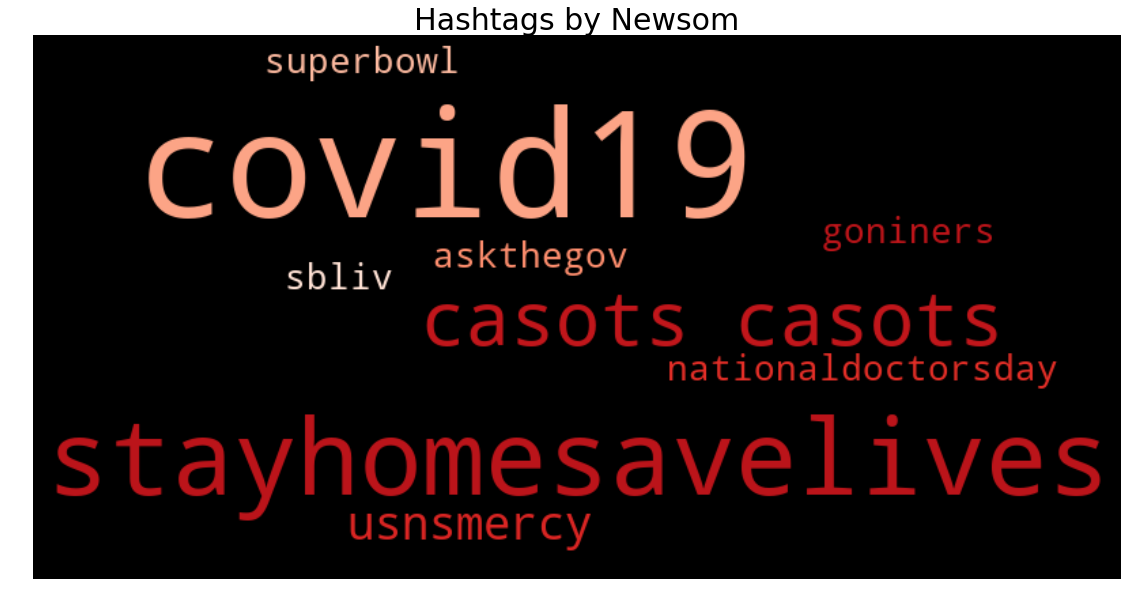

time: 672 ms


In [21]:
wordcloud1 = WordCloud(width=800, height=400, colormap="Reds").generate(' '.join(Newsom_hashtags['hashtags']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Hashtags by Newsom',fontsize=30)
plt.show()

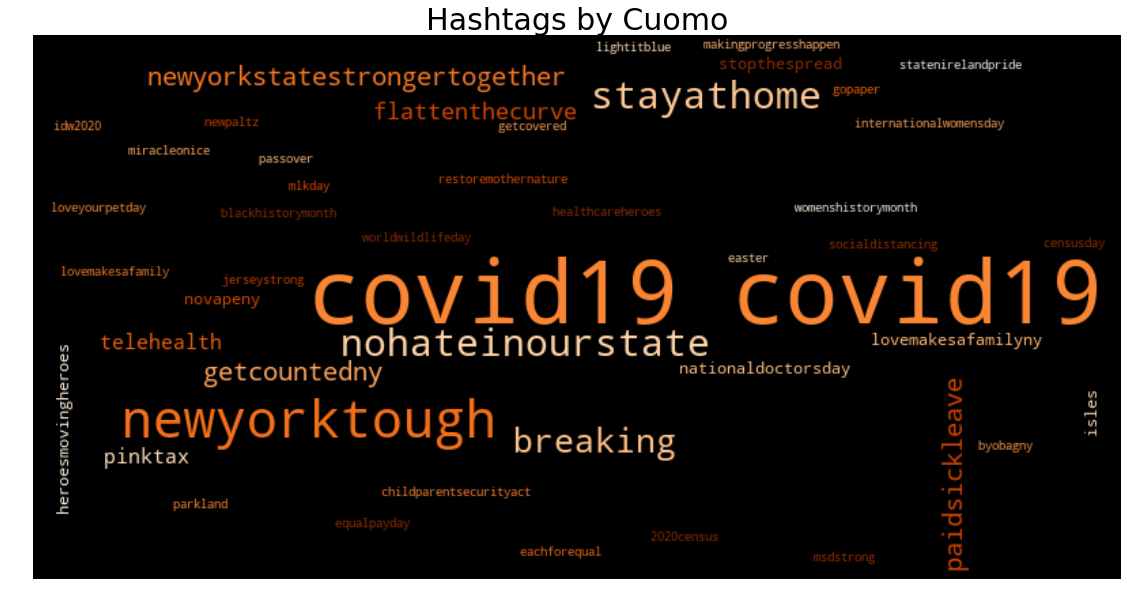

time: 775 ms


In [22]:
wordcloud2 = WordCloud(width=800, height=400, colormap="Oranges").generate(' '.join(Cuomo_hashtags['hashtags']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Hashtags by Cuomo',fontsize=30)
plt.show()

The wordcloud of Newsom has less elements than Cuomo's and mainly focus on the COVID-19, however, Cuomo's hashtags have a wider range.

### Sentiment Analysis with Textblob

In [23]:
# check for null value
print(tweets_df.isna().mean())

id                 0.0
conversation_id    0.0
date               0.0
timezone           0.0
username           0.0
tweet              0.0
hashtags           0.0
retweets_count     0.0
likes_count        0.0
dtype: float64
time: 116 ms


In [24]:
# text cleaning for tweets
tweets_prossced = tweets_df['tweet'].apply(lambda x: p.clean(x))

time: 184 ms


In [25]:
# perform sentiment analysis on tweets and save the results to the dataframe
polarity_lst = list()
subjectivity_lst = list()
for tweet in tweets_prossced:
    sentiment = TextBlob(tweet).sentiment
    polarity_lst.append(sentiment[0])
    subjectivity_lst.append(sentiment[1])

tweets_df['polarity'] = polarity_lst
tweets_df['subjectivity'] = subjectivity_lst

time: 401 ms


In [26]:
# Add histogram data
x1 = tweets_df[tweets_df['username']=='gavinnewsom']['polarity']
x2 = tweets_df[tweets_df['username']=='nygovcuomo']['polarity']
x3 = tweets_df[tweets_df['username']=='gavinnewsom']['subjectivity']
x4 = tweets_df[tweets_df['username']=='nygovcuomo']['subjectivity']

# Group data together
hist_data_polarity = [x1, x2]
hist_data_subjectivity = [x3, x4]

group_labels_polarity = ['Newsom', 'Cuomo']
group_labels_subjectivity = ['Newsom', 'Cuomo']

color = ['#ff1e56','#ffac41']


# Create distplot with custom bin_size
fig_polarity = ff.create_distplot(hist_data_polarity, group_labels_polarity, bin_size=.1, colors = color)
fig_polarity.update_layout(
    title="Ploarity Distribution",
    xaxis_title="Polarity",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)
fig_polarity.show()

fig_subjectivity = ff.create_distplot(hist_data_subjectivity, group_labels_subjectivity, bin_size=.1, colors = color)
fig_subjectivity.update_layout(
    title="Subjectivity Distribution",
    xaxis_title="Subjectivity",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)
fig_subjectivity.show()

time: 638 ms


In [27]:
trace1 = go.Box(
    y=x1,
    name = 'Newsom - polarity',
    marker = dict(
        color = '#ff1e56',
    )
)
trace2 = go.Box(
    y=x2,
    name = 'Cuomo - polarity',
    marker = dict(
        color = '#ffac41',
    )
)
trace3 = go.Box(
    y=x3,
    name = 'Newsom - subjectivity',
    marker = dict(
        color = '#eb4559',
    )
)
trace4 = go.Box(
    y=x4,
    name = 'Cuomo - subjectivity',
    marker = dict(
        color = '#f3c623',
    )
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Sentiment Boxplot of Governor Name",
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#f4f4f4")
)

fig = go.Figure(data=data,layout=layout)
fig.show()

time: 252 ms


From above displots and boxplots, we can tell that Cuomo is more positive and subjective than Newsom. Newsom is more serious and tend to convey messages based on fact rather than sentiment.

### Output the tweets data set

In [28]:
tweets_df.to_csv('tweets_Newsom_Cuomo.csv')

time: 130 ms
